# Inspecting and Authoring Properties

In this tutorial, we'll look at properties containing geometric data in the prims we produced in the previous Hello World! example. The starting layer for this exercise is at `extras/usd/tutorials/authoringProperties/HelloWorld.usda`.

This tutorial is available in `extras/usd/tutorials/authoringProperties/authorProperties.py`. You can follow along with this script in Python.

## Tutorial

1. Open the stage and get the prims defined in the stage:

In [1]:
from pxr import Usd, UsdGeom
stage = Usd.Stage.CreateNew('HelloWorld.usda')
xformSchema = UsdGeom.Xform.Define(stage, '/hello')
sphereSchema = UsdGeom.Sphere.Define(stage, '/hello/world')
xform = stage.GetPrimAtPath('/hello')
sphere = stage.GetPrimAtPath('/hello/world')

2. List the available property names on each of your prims.

In [2]:
xform.GetPropertyNames()

['proxyPrim', 'purpose', 'visibility', 'xformOpOrder']

In [3]:
sphere.GetPropertyNames()

['doubleSided',
 'extent',
 'orientation',
 'primvars:displayColor',
 'primvars:displayOpacity',
 'proxyPrim',
 'purpose',
 'radius',
 'visibility',
 'xformOpOrder']

3. Read the extent attribute on the sphere prim.

In [4]:
extentAttr = sphere.GetAttribute('extent')
extentAttr.Get()

Vt.Vec3fArray(2, (Gf.Vec3f(-1.0, -1.0, -1.0), Gf.Vec3f(1.0, 1.0, 1.0)))

This returns a two-by-three array containing the endpoints of the sphere's axis-aligned, object-space extent, as expected for the fallback value of this attribute, (i.e. no authored opinion in the scene description), given that the fallback radius for the sphere is 1.0. Calling Get() on the attribute with no arguments gives you the value for the attribute at the Default time. Attributes can also have time samples authored on them; for example on the points attribute of a UsdGeom.Mesh, in a pose cache (animation bake) exported from an animation package. (See the End to End Example for a mock-up of this pipeline in action).

---
**API Tip**

GetPropertyNames() is instructive for demonstrating that we can find and fetch properties by name. In practice, when one needs to iterate over a prim's properties, it is generally more convenient to use one of the flavors of GetProperties() or GetAttributes() or GetRelationships(), which return UsdProperty, UsdAttribute, and UsdRelationship properties upon which one can directly operate. 

---

4. Set the sphere's radius to 2. 

Because there is no magic recomputing the sphere's extent as a result (part of the reason why), we must also update it to reflect the sphere's new size.

In [5]:
radiusAttr = sphere.GetAttribute('radius')
radiusAttr.Set(2)

True

In [6]:
extentAttr.Set(extentAttr.Get() * 2)

True

Like Get(), calling Set() with only a value argument authors the value at the Default time. The resultant scene description should be:

In [7]:
print stage.GetRootLayer().ExportToString()

#usda 1.0

def Xform "hello"
{
    def Sphere "world"
    {
        float3[] extent = [(-2, -2, -2), (2, 2, 2)]
        double radius = 2
    }
}




5. Author a displayColor on the sphere.

As with Hello World Redux - Using Generic Prims, we can do so using the UsdGeom API rather than using the raw attribute name. Note how the (tab-completable) API abstracts that the attribute under the hood is actually namespaced as "primvars:displayColor", which is not something that an authoring client should need to know.

In [8]:
from pxr import UsdGeom
sphereSchema = UsdGeom.Sphere(sphere)
color = sphereSchema.GetDisplayColorAttr()
color.Set([(0,0,1)])

True

Note that the color value is a vector of triples-- this is because the primvars:displayColor attribute can represent either a prim-wide color, or a color per prim element (e.g. mesh face). The resultant scene description should be:

In [9]:
print stage.GetRootLayer().ExportToString()

#usda 1.0

def Xform "hello"
{
    def Sphere "world"
    {
        float3[] extent = [(-2, -2, -2), (2, 2, 2)]
        color3f[] primvars:displayColor = [(0, 0, 1)]
        double radius = 2
    }
}




6. Save your edits.

In [ ]:
stage.GetRootLayer().Save()

7. Here is the expected result in usdview.

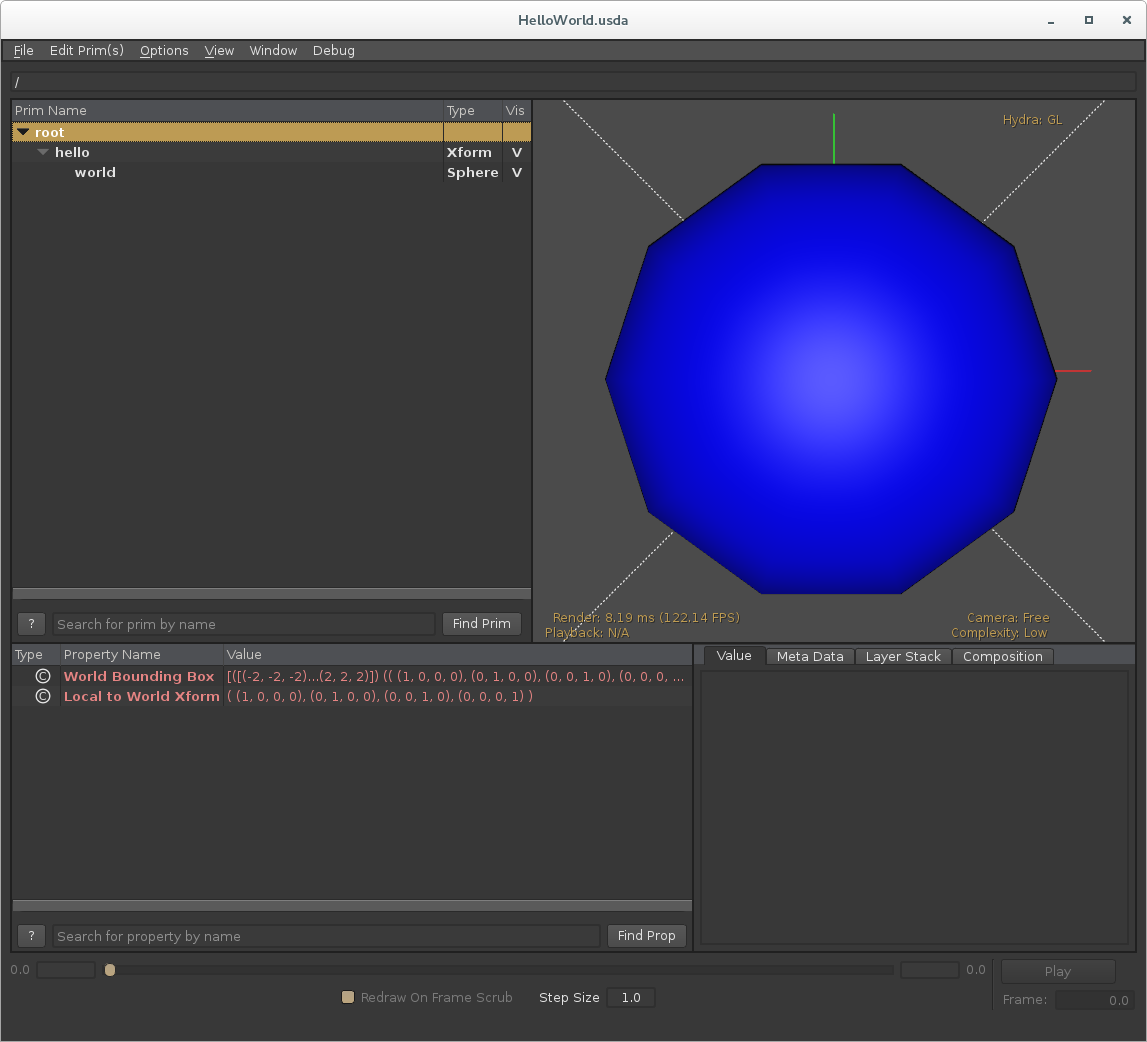

Note that the camera automatically frames the geometry, but we can see that it is larger than the sphere from the last tutorial by inspecting its attributes in the Attribute browser.

---

**Further Reading**

 - UsdProperty provides access to authoring and interrogating properties and their common metadata
 - UsdAttribute refines UsdProperty with specific API for time-sampled access to typed attribute data
 - UsdRelationship refines UsdProperty with API to target other prims and properties, and resolve those targets robustly, and through chains of relationships.
 - Properties are ordered in dictionary order, by default, but one can explicitly order properties using UsdPrim::SetPropertyOrder()

---